In [25]:
import pandas as pd
clean_path = 'credit_card_transactions_clean.csv'
df = pd.read_csv(clean_path)
# print("Loaded", df.shape, "rows × columns")
df.head(20)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_outlier
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0


In [26]:
import numpy as np
np.random.seed(1881)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/xs/g6m4r1f1143fq00sptsdftnh0000gn/T/ipykernel_91263/3982720642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud', data=df, palette='viridis')


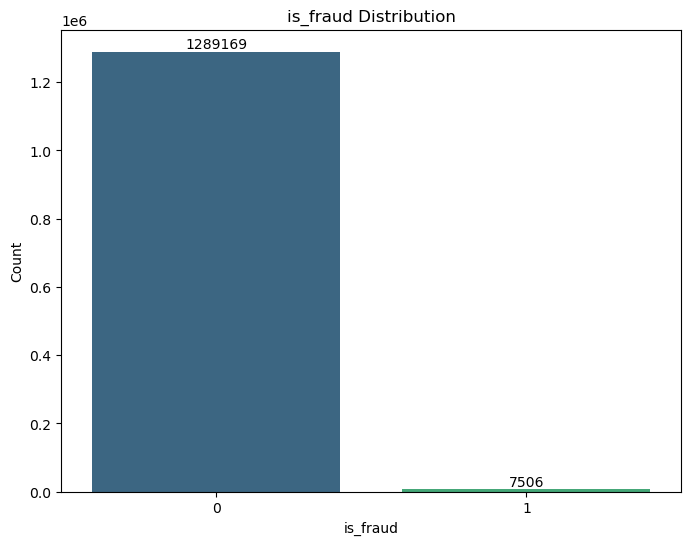

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')
plt.title('is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

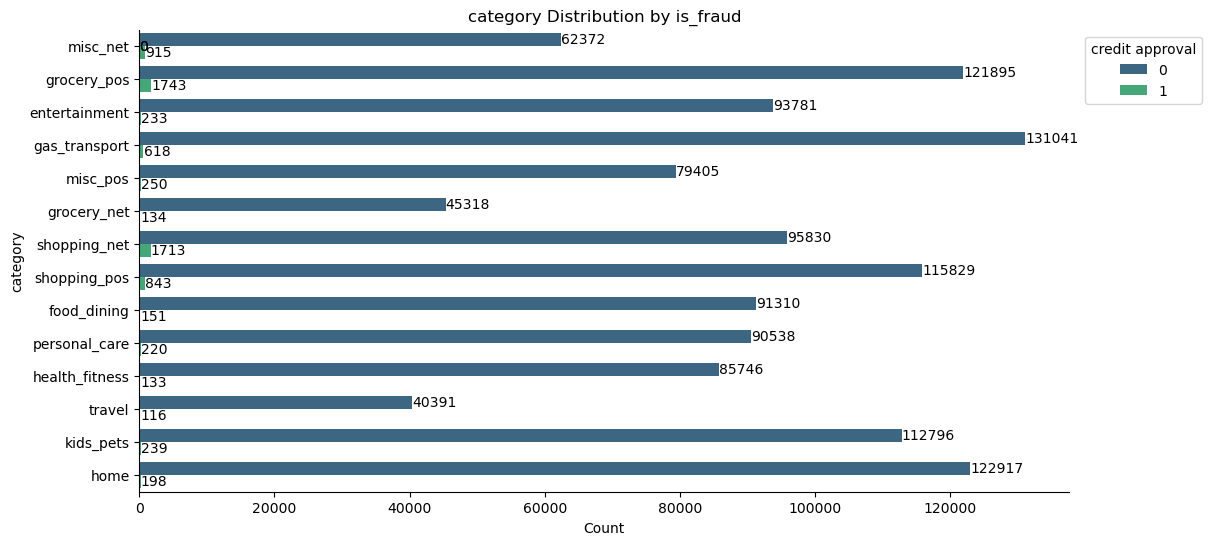

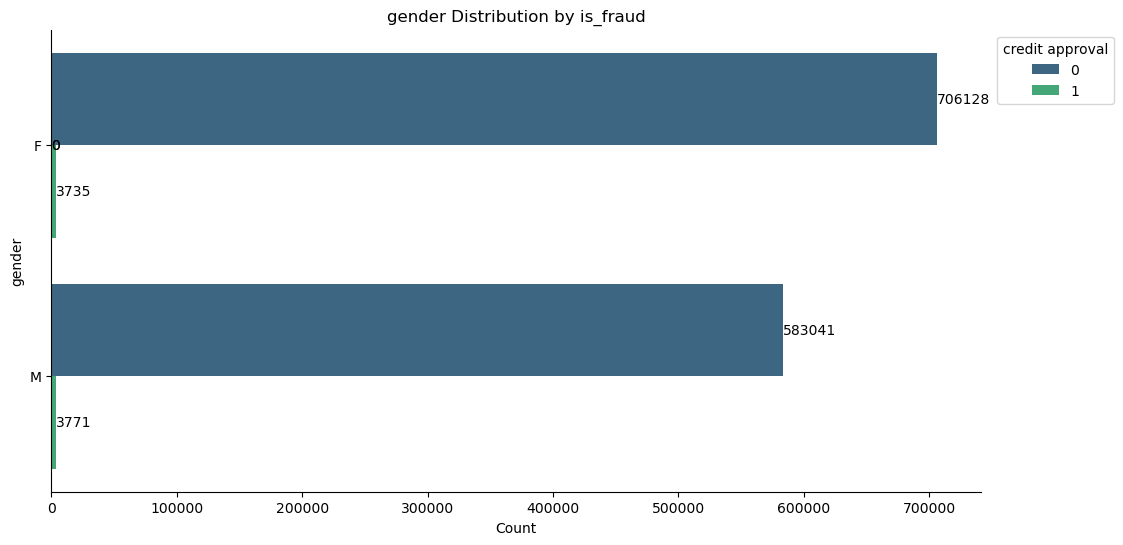

In [28]:
categorical_columns = ['category', 'gender']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=column, hue='is_fraud', data=df, palette='viridis')
    plt.title(f'{column} Distribution by is_fraud')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.legend(title='credit approval', loc='upper right', bbox_to_anchor=(1.15, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 10, p.get_y() + p.get_height() / 2, 
                f'{int(width)}', 
                ha='left', va='center')

    plt.show()

/var/folders/xs/g6m4r1f1143fq00sptsdftnh0000gn/T/ipykernel_91263/54370271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['trans_date_trans_time'] = pd.to_datetime(fraud_transactions['trans_date_trans_time'])
/var/folders/xs/g6m4r1f1143fq00sptsdftnh0000gn/T/ipykernel_91263/54370271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['season'] = fraud_transactions['trans_date_trans_time'].dt.month % 12 // 3 + 1
/var/folders/xs/g6m4r1f1143fq00sptsdftnh0000gn/T/ipykern

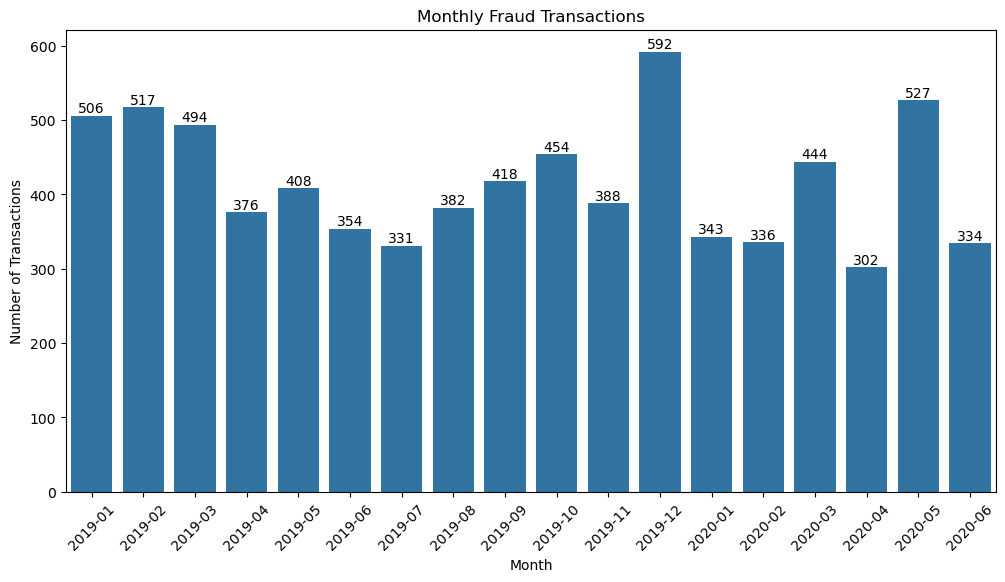

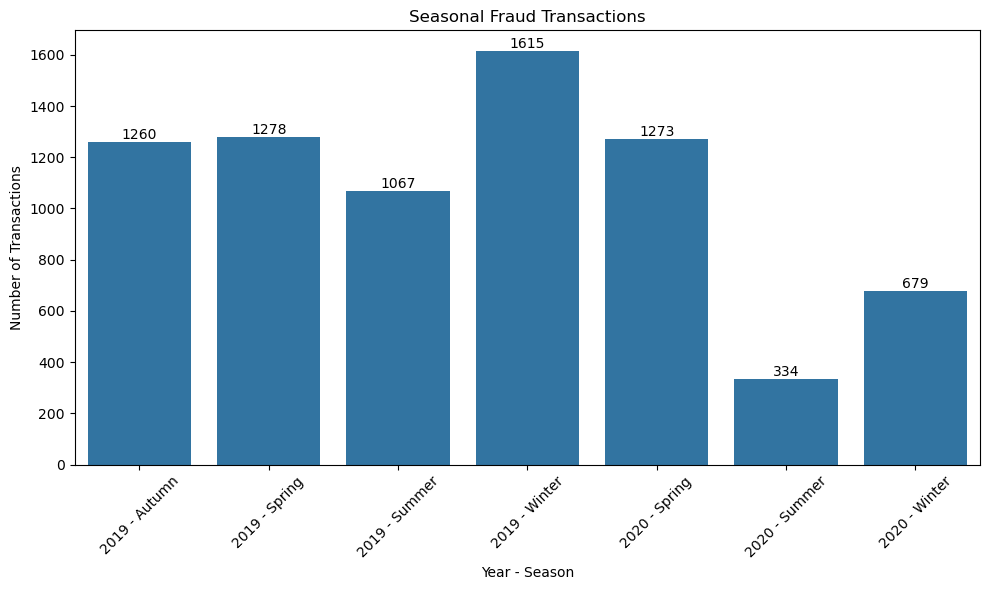

In [29]:
data_copy = df.copy()
fraud_transactions = data_copy[data_copy['is_fraud'] == 1]
non_fraud_transactions = data_copy[data_copy['is_fraud'] == 0]

fraud_transactions['trans_date_trans_time'] = pd.to_datetime(fraud_transactions['trans_date_trans_time'])
monthly_counts = fraud_transactions['trans_date_trans_time'].dt.to_period('M').value_counts().sort_index()
fraud_transactions['season'] = fraud_transactions['trans_date_trans_time'].dt.month % 12 // 3 + 1
fraud_transactions['year'] = fraud_transactions['trans_date_trans_time'].dt.year
fraud_transactions['year_season'] = fraud_transactions['year'].astype(str) + ' - ' + fraud_transactions['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
seasonal_counts = fraud_transactions['year_season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values)
plt.title('Monthly Fraud Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
plt.title('Seasonal Fraud Transactions')
plt.xlabel('Year - Season')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

for i, count in enumerate(seasonal_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

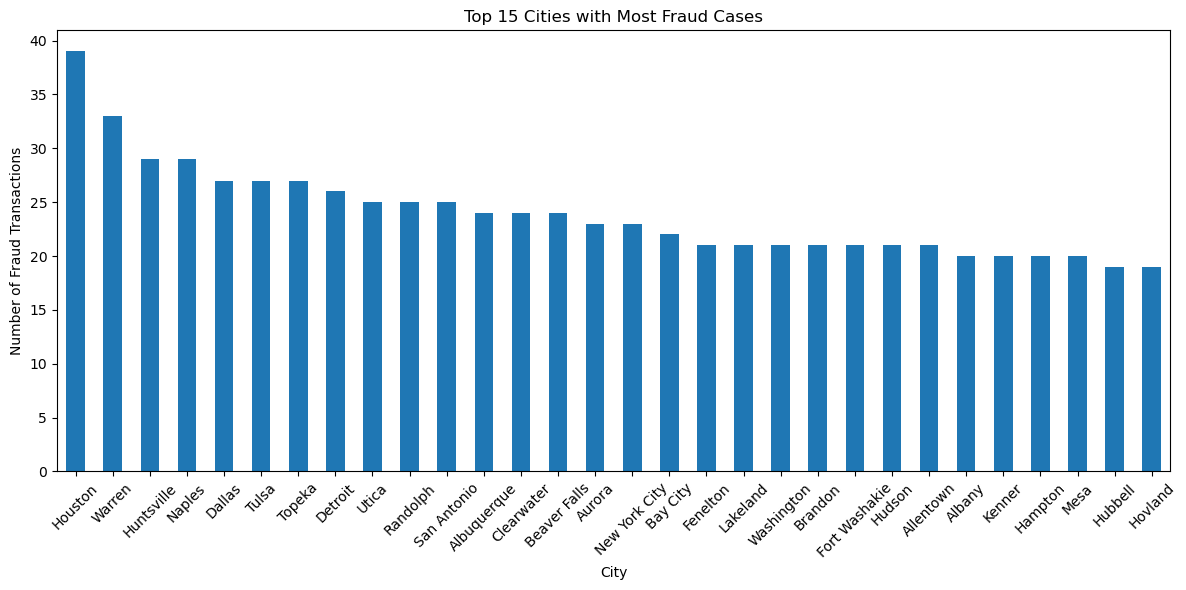

In [30]:
fraud_by_city = df[df['is_fraud'] == 1]['city'].value_counts().head(30)  

# 
plt.figure(figsize=(12, 6))
fraud_by_city.plot(kind='bar')
plt.title('Top 15 Cities with Most Fraud Cases')
plt.xlabel('City')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

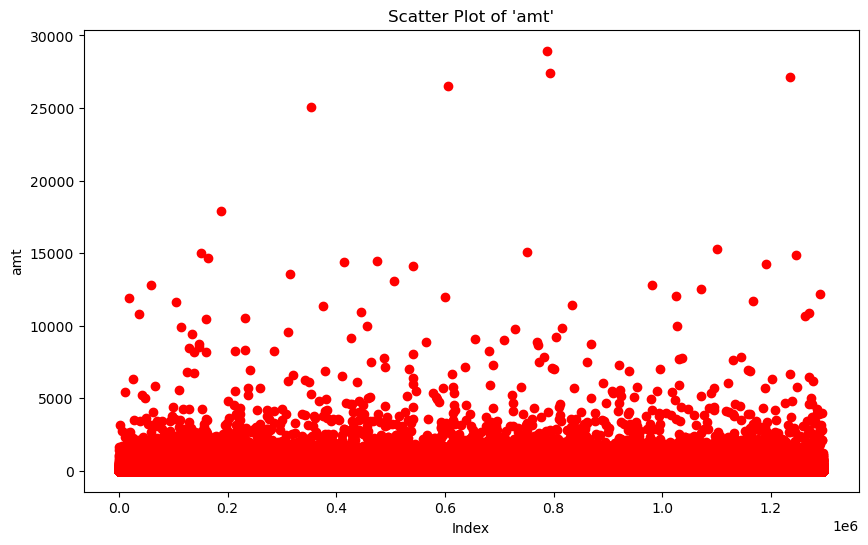

In [31]:
plt.figure(figsize=(10, 6))  
plt.scatter(df.index, df['amt'], color='red') 
plt.title("Scatter Plot of 'amt'")  
plt.xlabel('Index')  
plt.ylabel('amt')  
plt.show()  

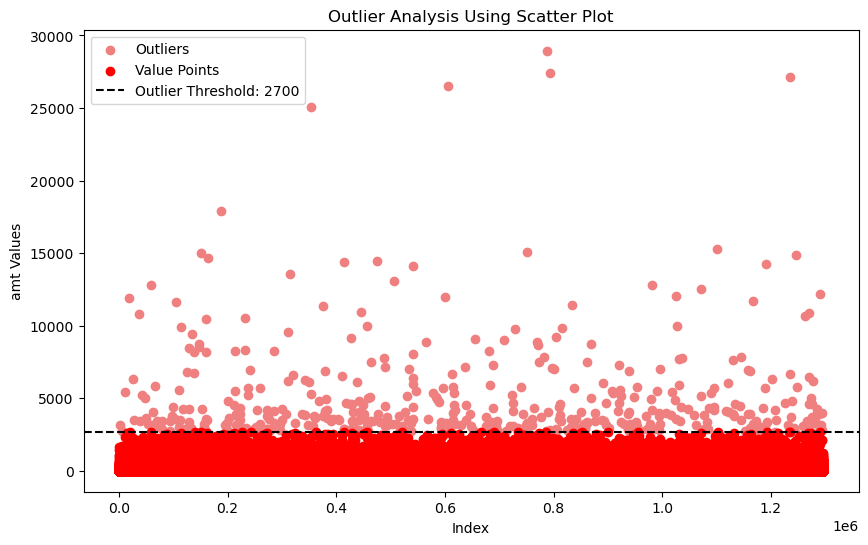

Number of outliers: 430
Outlier percentage: % 0.033161740605780164


In [32]:
outlier_threshold = 2700
outliers = df['amt'] > outlier_threshold
outlier_count = np.count_nonzero(outliers)
total_count = len(df)
outlier_percentage = (outlier_count / total_count) * 100

plt.figure(figsize=(10, 6))
plt.scatter(df.index[outliers], df['amt'][outliers], color='lightcoral', label='Outliers')
plt.scatter(df.index[~outliers], df['amt'][~outliers], color='red', label='Value Points')
plt.axhline(y=outlier_threshold, color='black', linestyle='--', label=f'Outlier Threshold: {outlier_threshold}')
plt.title('Outlier Analysis Using Scatter Plot')
plt.xlabel('Index')
plt.ylabel('amt Values')
plt.legend()
plt.show()


print(f'Number of outliers: {outlier_count}')
print(f'Outlier percentage: % {outlier_percentage}')

In [39]:
data1 = df.copy()

In [40]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'amt_outlier'],
      dtype='object')

In [41]:
drop_cols = ['cc_num', 'first', 'last', 'street', 'zip', 'job', 'dob', 'trans_num', 'unix_time' ,'amt_outlier']
data1 = data1.drop(columns=drop_cols)

In [42]:
data1

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,42.788940,-103.241160,0


In [43]:
#select features
features = ['category', 'amt', 'gender', 'city', 'state', 'lat', 'long', 'city_pop']
target = 'is_fraud'

X = data1[features]
y = data1[target]


In [44]:
from sklearn.model_selection import train_test_split

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/21/1b/550ee378512b78847930f5d74228ca1fdba2a7fbdeaac9aeccc085b0e257/lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

In [66]:
# ---------- Step 1: dealing unbalance ----------
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
scale_pos_weight = class_weights_dict[1] / class_weights_dict[0]

# ---------- Step 2: Unified definition of classification model ----------
models = {
    "CatBoost": CatBoostClassifier(
        depth=10, learning_rate=0.2, n_estimators=2000, min_child_samples=10,
        subsample=0.7, l2_leaf_reg=8, cat_features=cat_cols,
        random_state=1881, eval_metric='F1', loss_function='Logloss',
        bootstrap_type='Bernoulli', class_weights=class_weights_dict,
        task_type='CPU', verbose=False
    ),
    "XGBoost": XGBClassifier(
        max_depth=7, learning_rate=0.2, n_estimators=2000, min_child_weight=10,
        subsample=0.8, reg_lambda=1, reg_alpha=3,
        scale_pos_weight=scale_pos_weight,
        objective='binary:logistic', eval_metric='logloss',
        tree_method='gpu_hist',enable_categorical=True, random_state=1881, verbosity=0
    ),
    "LightGBM": LGBMClassifier(
        max_depth=8, num_leaves=64, learning_rate=0.03, n_estimators=2000,
        min_child_weight=10, subsample=0.9, reg_lambda=3, reg_alpha=1,
        scale_pos_weight=scale_pos_weight,
        objective='binary', metric='binary_logloss',
        random_state=1881, device='gpu', verbose=-1
    )
}



===== Training CatBoost =====
Confusion Matrix for CatBoost:


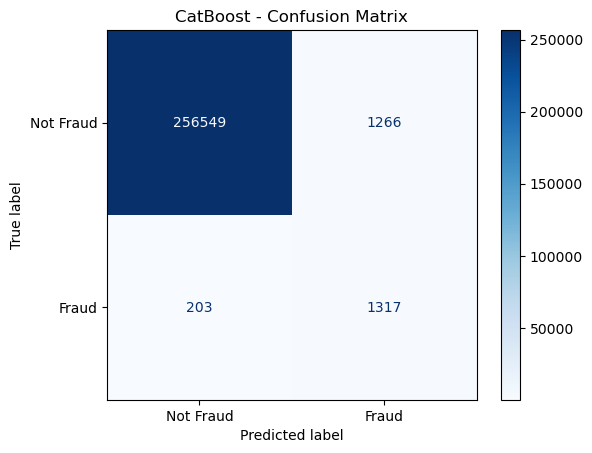


Classification Report for CatBoost:

              precision    recall  f1-score   support

           0     0.9992    0.9951    0.9971    257815
           1     0.5099    0.8664    0.6420      1520

    accuracy                         0.9943    259335
   macro avg     0.7545    0.9308    0.8196    259335
weighted avg     0.9963    0.9943    0.9951    259335


===== Training XGBoost =====


XGBoostError: [00:27:56] /Users/runner/work/xgboost/xgboost/src/gbm/../common/common.h:181: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000030d77d9e0 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000030d96037c xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 1280
  [bt] (2) 3   libxgboost.dylib                    0x000000030d97fe18 xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (3) 4   libxgboost.dylib                    0x000000030d980068 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (4) 5   libxgboost.dylib                    0x000000030d7a056c XGBoosterUpdateOneIter + 144
  [bt] (5) 6   libffi.8.dylib                      0x000000010125404c ffi_call_SYSV + 76
  [bt] (6) 7   libffi.8.dylib                      0x0000000101251834 ffi_call_int + 1404
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x0000000101234150 _ctypes_callproc + 752
  [bt] (8) 9   _ctypes.cpython-311-darwin.so       0x000000010122e4b4 PyCFuncPtr_call + 228



In [67]:
# Convert all object columns to category dtype for compatibility with XGBoost and LightGBM
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Train and evaluate each model
for name, model in models.items():
    print(f"\n===== Training {name} =====")
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    preds = model.predict(X_test)
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, preds)
    print(f"Confusion Matrix for {name}:")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Display classification report
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, preds, digits=4))
